In [1]:
from tensorflow.keras.models import load_model
from functions import margin_loss_fun_factory,DataGenerator,PredictGenerator,\
                        l2_distance_np,top_k,loop_distance,MAP,generate_feature,GridSearch,dot_distance_neg_np
import pickle
from albumentations import ShiftScaleRotate,Cutout,RandomContrast,RandomBrightness,Compose
from utility.albumentations_helper import create_transform
import time
import tensorflow as tf
import numpy as np
from functools import partial

In [2]:
## change ##
color = False
distance = l2_distance_np
# FFA_size = 4

Load model

In [3]:
feature_model = load_model('Models/feature_model_DenseNet_MLP2.h5')

In [4]:
#feature_model = load_model('Models/feature_l2_distance_margin_loss_fun_factory(0.1,5).h5', \
#                            custom_objects={'loss': margin_loss_fun_factory(0.1,5)})

In [5]:
if color:
    with open('/home/will/Desktop/kaggle/Whale/train_df_color.pkl', 'rb') as f:
        Ids_train = pickle.load(f)
    with open('/home/will/Desktop/kaggle/Whale/new_whale_train_color.pkl', 'rb') as f:
        newWhale_train = pickle.load(f)
    with open('/home/will/Desktop/kaggle/Whale/val_df_color.pkl', 'rb') as f:
        Ids_val = pickle.load(f)
    with open('/home/will/Desktop/kaggle/Whale/new_whale_val_color.pkl', 'rb') as f:
        newWhale_val = pickle.load(f)
else:
    with open('/home/will/Desktop/kaggle/Whale/train_df.pkl', 'rb') as f:
        Ids_train = pickle.load(f)
    with open('/home/will/Desktop/kaggle/Whale/new_whale_train.pkl', 'rb') as f:
        newWhale_train = pickle.load(f)
    with open('/home/will/Desktop/kaggle/Whale/val_df.pkl', 'rb') as f:
        Ids_val = pickle.load(f)
    with open('/home/will/Desktop/kaggle/Whale/new_whale_val.pkl', 'rb') as f:
        newWhale_val = pickle.load(f)

In [6]:
aug = Compose([RandomContrast(p=0.2),RandomBrightness(p=0.2),
                ShiftScaleRotate(shift_limit=0.03,rotate_limit=15,scale_limit=0.02,p=1)])
transform = create_transform(aug)    

In [33]:
# aggFuns = [partial(np.quantile,q=pct,axis=(1,2)) for pct in [0.1,0.25,0.5]] + [partial(np.mean,axis=(1,2))]
# FFA_sizes = [4,8]
aggFuns = [partial(np.quantile,q=pct,axis=(1,2)) for pct in np.linspace(0,0.2,21)]
FFA1_sizes = [4]
FFA2_sizes = [4]

In [34]:
gs_dict = GridSearch(aggFuns,FFA1_sizes,FFA2_sizes,Ids_train,Ids_val,\
                     transform,color,feature_model,distance,k=5)

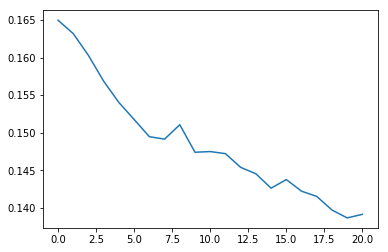

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([gs_dict[(4,4),pct] for pct in np.linspace(0,0.2,21)])

In [37]:
gs_dict

{((4, 4), 0.0): 0.1649659863945578,
 ((4, 4), 0.01): 0.1631880024737168,
 ((4, 4), 0.02): 0.16028138528138527,
 ((4, 4), 0.03): 0.15684910327767468,
 ((4, 4), 0.04): 0.15401978973407549,
 ((4, 4), 0.05): 0.15176252319109462,
 ((4, 4), 0.06): 0.14947433518862088,
 ((4, 4), 0.07): 0.1491496598639456,
 ((4, 4), 0.08): 0.15106679035250462,
 ((4, 4), 0.09): 0.14740259740259737,
 ((4, 4), 0.1): 0.14749536178107608,
 ((4, 4), 0.11): 0.14721706864564008,
 ((4, 4), 0.12): 0.1453927025355597,
 ((4, 4), 0.13): 0.14454236239950524,
 ((4, 4), 0.14): 0.1426252319109462,
 ((4, 4), 0.15): 0.14376932591218308,
 ((4, 4), 0.16): 0.14222325293753865,
 ((4, 4), 0.17): 0.14152752009894867,
 ((4, 4), 0.18): 0.13971861471861471,
 ((4, 4), 0.19): 0.13866728509585655,
 ((4, 4), 0.2): 0.1391465677179963}

In [29]:
gs_dict

{((4, 4), 0.0): 0.1567408781694496,
 ((4, 4), 0.01): 0.16006493506493508,
 ((4, 4), 0.02): 0.1601113172541744,
 ((4, 4), 0.03): 0.15576685219542363,
 ((4, 4), 0.04): 0.15247371675943105,
 ((4, 4), 0.05): 0.14907235621521334,
 ((4, 4), 0.06): 0.14947433518862088,
 ((4, 4), 0.07): 0.14860853432282006,
 ((4, 4), 0.08): 0.1532003710575139,
 ((4, 4), 0.09): 0.153586889301175,
 ((4, 4), 0.1): 0.15205627705627708}

In [21]:
gs_dict

{((1, 1), 0.1): 0.12183055040197896,
 ((1, 1), 0.25): 0.12183055040197896,
 ((2, 2), 0.1): 0.14724799010513298,
 ((2, 2), 0.25): 0.13786332714904145,
 ((3, 3), 0.1): 0.15728200371057516,
 ((3, 3), 0.25): 0.14083178726035872}

In [10]:
gs_dict

{((4, 4), 0.1): 0.1507421150278293,
 ((4, 4), 0.25): 0.13051948051948054,
 ((4, 8), 0.1): 0.1494279529993816,
 ((4, 8), 0.25): 0.13031849103277676,
 ((8, 4), 0.1): 0.1591063698206555,
 ((8, 4), 0.25): 0.13252937538651824}

In [8]:
gs_dict

{((4, 4), 0.1): 0.15904452690166976,
 ((4, 4), 0.25): 0.14534632034632036,
 ((4, 4), 0.5): 0.13297773654916512,
 ((4, 4), None): 0.11040507111935685,
 ((8, 8), 0.1): 0.17960729746444032,
 ((8, 8), 0.25): 0.15335497835497836,
 ((8, 8), 0.5): 0.12680890538033393,
 ((8, 8), None): 0.08783240568954855}